In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)  # Ensures that the display width isn't restricted
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('Network_anomaly_data.csv')
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [4]:
X = df.drop('attack',axis=1)
y = df['attack']

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)

In [6]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

target_encoder = LabelEncoder()
y_train = target_encoder.fit_transform(y_train)
y_test = target_encoder.transform(y_test)

In [8]:
categorical_columns = ['protocoltype', 'service', 'flag']

encoder = LabelEncoder()
for col in categorical_columns:
    X_train[col] = encoder.fit_transform(X_train[col])
    X_test[col] = encoder.transform(X_test[col])

In [9]:
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [12]:
y_pred = model.predict(X_test)

In [13]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9923


In [18]:
X_train.shape

(100778, 42)

In [21]:
model.coef_.flatten().shape

(966,)

In [22]:
X.columns.shape

(42,)

In [34]:
coefficients = model.coef_
feature_importance_df = pd.DataFrame(coefficients.T, columns=[f'class_{i}' for i in range(coefficients.shape[0])], index=X.columns)
class_names = target_encoder.classes_
feature_importance_df.columns = [f'{class_names[i]}' for i in range(len(class_names))]

In [35]:
display(feature_importance_df)

,back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster
duration,-0.571413,-0.036003,-0.001619,-0.029576,-0.021379,0.057070,0.000841,0.011065,0.045869,-0.383912,-0.852883,1.848445,-0.003707,-0.033640,-0.010725,2.106250,0.054926,-4.260122,-0.053931,0.046412,0.011487,2.499757,-0.423212
protocoltype,-0.581857,0.337927,1.102774,-0.408489,0.802199,-5.697277,-0.031097,0.173191,0.982281,0.726733,0.431402,1.921217,-0.043708,-0.008732,-2.189163,-1.898412,2.050410,3.764137,-5.273150,0.149980,1.015294,1.366229,1.308112
service,-0.109031,0.049798,-0.044401,0.148725,-0.021405,0.005761,-0.027735,0.061153,-0.024522,0.052364,0.104752,-0.026306,0.004024,-0.123515,0.118041,0.042789,0.032545,0.038315,-0.313413,0.089141,0.174745,-0.171111,-0.060714
flag,0.491348,-0.237597,0.092288,-0.439797,0.723169,-0.412269,-0.173687,-0.260509,0.330104,-0.802522,0.998742,-0.357017,-0.242167,-0.001377,-0.104289,-0.370995,-0.334657,-0.035201,1.444404,-0.144407,-0.704113,0.204212,0.336338
srcbytes,0.095747,-0.021005,-0.015361,0.002886,-0.010597,-0.022069,-0.000036,-0.004549,-0.011647,-0.045940,-0.539179,-0.125903,-0.000030,-0.000443,-0.006970,0.466867,-0.014670,-0.045047,-0.038766,0.000429,0.000928,0.359564,-0.024210
dstbytes,-0.010532,-0.112724,-0.076344,-0.003662,0.072783,-0.117096,0.000062,-0.044770,0.318607,-0.157645,-1.696533,-0.173007,-0.001721,-0.000962,-0.028110,1.213202,-0.074047,-0.033452,-0.021174,-0.004717,-0.000379,-0.531848,1.484070
land,-0.023974,-0.000231,-0.084601,0.003615,-0.059681,-0.258165,0.549804,0.003785,-0.006060,-0.061623,-0.119183,0.191061,0.000158,-0.000398,-0.005197,-0.027859,0.002799,-0.036558,-0.013869,0.001290,-0.011765,-0.043335,-0.000016
wrongfragment,-0.084456,0.006637,0.006435,0.035579,0.004702,-2.254027,0.002744,0.025828,-0.003751,-0.193588,-0.652034,-1.712158,0.003746,0.000643,3.155808,-0.113269,0.030464,-0.885541,-1.061449,0.010654,3.792005,-0.112271,-0.002700
urgent,-0.048300,-0.001208,0.161780,0.001650,0.001905,-0.053118,0.000238,0.002298,0.000129,-0.012199,-0.000589,0.117688,0.000350,0.000069,-0.012047,-0.025009,0.002795,-0.080342,-0.002100,0.000934,0.000780,-0.056316,0.000611
hot,3.306407,0.208254,-0.207159,0.541911,0.528925,-0.029010,0.001128,-0.427991,-0.348462,-0.450060,-0.643588,0.306709,-0.180808,0.053542,-0.005878,-1.923961,-0.121883,-0.653716,-0.054295,-0.017611,-0.006985,1.087329,-0.962799


In [40]:
pd.DataFrame(feature_importance_df['normal'].sort_values(ascending=False)).T

,protocoltype,duration,lastflag,loggedin,serrorrate,dsthostdiffsrvrate,numroot,diffsrvrate,dsthostsamesrvrate,dsthostsrvdiffhostrate,numfilecreations,hot,dsthostsrvcount,samesrvrate,suattempted,land,numfailedlogins,rootshell,srvcount,numshells,urgent,rerrorrate,isguestlogin,numaccessfiles,ishostlogin,numoutboundcmds,dsthostcount,service,srvdiffhostrate,numcompromised,srcbytes,dstbytes,srvrerrorrate,flag,dsthostsrvserrorrate,count,dsthostsrvrerrorrate,dsthostserrorrate,dsthostrerrorrate,srvserrorrate,dsthostsamesrcportrate,wrongfragment
normal,1.921217,1.848445,1.320421,1.187433,1.103994,0.962297,0.881459,0.754623,0.638916,0.522795,0.373742,0.306709,0.302186,0.277182,0.217762,0.191061,0.189526,0.173822,0.169096,0.13219,0.117688,0.117257,0.10725,0.044424,0.006753,0.0,-0.001827,-0.026306,-0.034885,-0.056799,-0.125903,-0.173007,-0.181169,-0.357017,-0.401562,-0.407765,-0.621171,-0.754945,-1.018883,-1.06497,-1.13568,-1.712158


In [41]:
pd.DataFrame(feature_importance_df['neptune'].sort_values(ascending=False)).T

,dsthostserrorrate,dsthostrerrorrate,serrorrate,srvserrorrate,dsthostsrvserrorrate,srvcount,lastflag,protocoltype,srvrerrorrate,dsthostsrvdiffhostrate,rerrorrate,count,service,numoutboundcmds,ishostlogin,urgent,srvdiffhostrate,numshells,srcbytes,land,numaccessfiles,rootshell,suattempted,isguestlogin,numfailedlogins,numfilecreations,dstbytes,numroot,wrongfragment,numcompromised,dsthostsrvrerrorrate,duration,hot,flag,dsthostcount,diffsrvrate,dsthostdiffsrvrate,dsthostsrvcount,dsthostsamesrcportrate,samesrvrate,loggedin,dsthostsamesrvrate
neptune,6.895749,4.658778,2.434385,2.033709,1.710516,1.601125,0.946521,0.726733,0.6973,0.568939,0.556086,0.312205,0.052364,0.0,-0.007455,-0.012199,-0.015573,-0.024413,-0.04594,-0.061623,-0.066229,-0.081161,-0.081267,-0.094412,-0.128306,-0.139407,-0.157645,-0.190864,-0.193588,-0.204368,-0.351763,-0.383912,-0.45006,-0.802522,-0.950387,-1.123144,-1.413953,-2.416948,-2.715794,-2.74873,-4.102115,-4.103365


In [42]:
pd.DataFrame(feature_importance_df['satan'].sort_values(ascending=False)).T

,protocoltype,dsthostcount,dsthostsrvrerrorrate,rerrorrate,diffsrvrate,dsthostsrvcount,dsthostdiffsrvrate,count,isguestlogin,dsthostrerrorrate,numfilecreations,numfailedlogins,dsthostsrvdiffhostrate,service,numoutboundcmds,ishostlogin,dstbytes,flag,land,numroot,srcbytes,dsthostsamesrcportrate,numcompromised,urgent,suattempted,numaccessfiles,dsthostsrvserrorrate,numshells,rootshell,lastflag,srvcount,hot,srvserrorrate,samesrvrate,srvdiffhostrate,loggedin,wrongfragment,dsthostserrorrate,srvrerrorrate,dsthostsamesrvrate,serrorrate,duration
satan,3.764137,2.011264,1.275145,0.959136,0.881909,0.781023,0.737653,0.58269,0.562662,0.463808,0.449779,0.148242,0.075181,0.038315,0.0,-0.016851,-0.033452,-0.035201,-0.036558,-0.038979,-0.045047,-0.063252,-0.073714,-0.080342,-0.081008,-0.123507,-0.158211,-0.168446,-0.214208,-0.302739,-0.53565,-0.653716,-0.663153,-0.699612,-0.812388,-0.855215,-0.885541,-0.989965,-1.017636,-1.326143,-1.466915,-4.260122


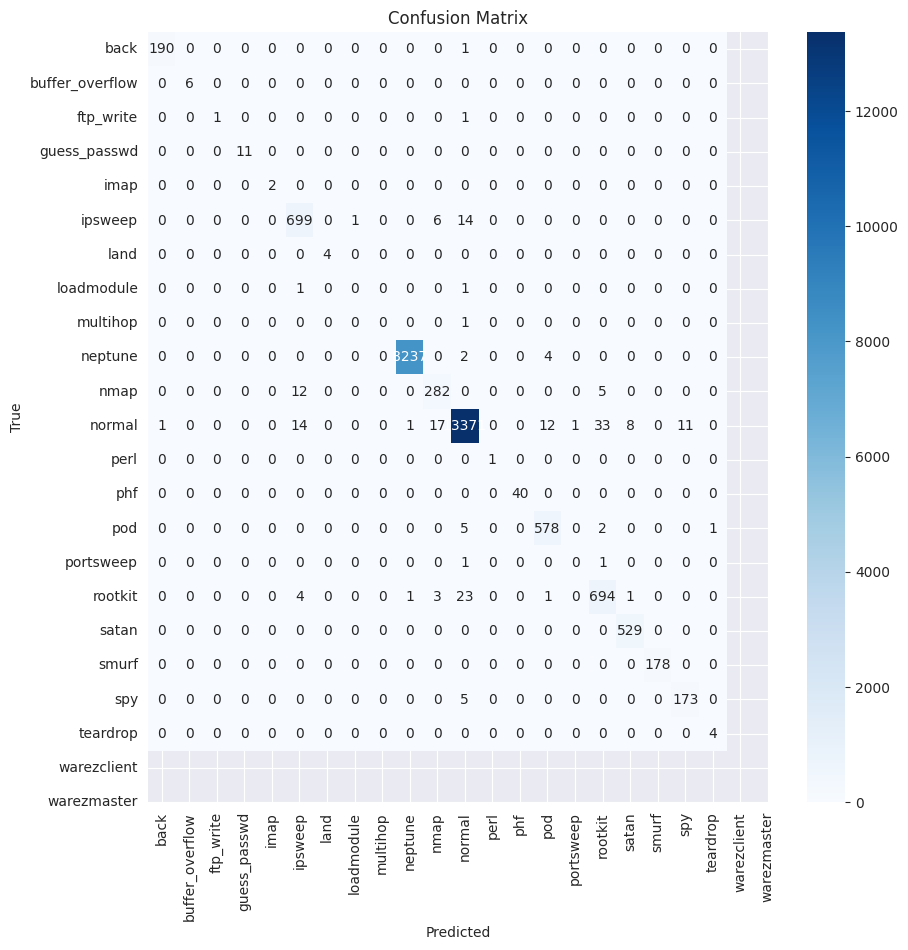

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()